<a href="https://colab.research.google.com/github/marismendi9/CreditCardFraudDetection/blob/main/Proyecto_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2**

* **Nombre del proyecto**: Detección de fraude en tarjetas de crédito
* **Nombre completo**: Mariana Arismendi
* **ID Coding Dojo**: 80511
* **Track**: Advanced Machine Learning

# **Detección de fraude en tarjetas de crédito**

La globalización nos ha llevado a desarrollar nuevas técnicas que permita a las industrias llegar a más clientes con la mayor facilidad posible. Las tarjetas de crédito ha sido uno de los inventos nacidos del boom de la tecnología y de una forma de la necesidad de llevar una billetera digital que permita efectuar compras y recibir dinero de forma virtual, esto genera más comodidad y seguridad, aparentemente.

El boom de la digitalización no solo ha permitido conectar a la humanidad más que nunca, si no también se ha prestado para que personajes maliciosos, como siempre han habido, se valgan de estos medios para realizar desfalcos a otras personas.

Sin embargo, esto no se queda ahí, la tecnología cada día avanza más y al día de hoy existen técnicas de verificación de identidad que ponen varios filtros al momento de usar las tarjetas de crédito y, cuando todo lo anterior falle, a continuación presento diferentes técnicas de machine learning de aprendizaje supervisado que permita analizar datos históricos y patrones para la identificación exitosa de posibles transacciones fraudulentas que permitan al sistema bancario bloquear determinadas transacciones hasta que se verifique la naturaleza de las mismas con el fin de reducir al mínimo los fraudes de tarjetas de crédito y permita fortalecer los sistemas bancarios de verificación mismos.

In [31]:
# Montar Google Colab para cargar datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/Codes Dojo/2 - Machine Learning/datasets/creditcard.csv')

# Leer los datos
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **I.- Análisis Exploratorio**

### **Descripción del dataset**

El conjunto de datos trabajado fue tomado de [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

| Característica | Descripción                                                                |   |   |
|----------------|----------------------------------------------------------------------------|---|---|
| V1 - V28       | Características   numéricas que son el resultado de la transformación PCA |   |   |
| Tiempo         | Segundos   transcurridos entre cada transacción y la primera transacción   |   |   |
| Importe        | Importe   de la transacción                                                |   |   |
| Clase          | Fraude  (1) o de otro tipo (0)                                             |   |   |

In [34]:
# Tamaño de la data
df.shape

(284807, 31)

In [35]:
# Corroborar los nombres de las columnas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
# Chequear duplicados
df.duplicated().sum()

1081

In [37]:
# Remover duplicados y volver a chequear
df = df.drop_duplicates()
df.duplicated().sum()

0

In [38]:
# Resumen de la información
def resumen_col(df,col):
    pd_series = df[col]
    
    # Elementos distintos 
    n_unique = pd_series.unique()
    
    # Elementos vacios
    
    n_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'Columna': [col],
        'Únicos': [len(n_unique)],
        'Nulos': [len(n_vacios)]
    })
    
    return df_info

In [39]:
# Revisar valores nulos/únicos/porcentaje de nulos
frames = []

for col in df.columns:
  aux_df = resumen_col(df, col)
  frames.append(aux_df)

df_info = pd.concat(frames).reset_index(drop = True)
df_info['% nulos'] = df_info['Nulos']/len(df)
print(df_info)

# Revisar tipos de datos
print('\nTipos de datos:\n',df.dtypes)

   Columna  Únicos  Nulos  % nulos
0     Time  124592      0      0.0
1       V1  275663      0      0.0
2       V2  275663      0      0.0
3       V3  275663      0      0.0
4       V4  275663      0      0.0
5       V5  275663      0      0.0
6       V6  275663      0      0.0
7       V7  275663      0      0.0
8       V8  275663      0      0.0
9       V9  275663      0      0.0
10     V10  275663      0      0.0
11     V11  275663      0      0.0
12     V12  275663      0      0.0
13     V13  275663      0      0.0
14     V14  275663      0      0.0
15     V15  275663      0      0.0
16     V16  275663      0      0.0
17     V17  275663      0      0.0
18     V18  275663      0      0.0
19     V19  275663      0      0.0
20     V20  275663      0      0.0
21     V21  275663      0      0.0
22     V22  275663      0      0.0
23     V23  275663      0      0.0
24     V24  275663      0      0.0
25     V25  275663      0      0.0
26     V26  275663      0      0.0
27     V27  275663  

* Vemos que no existen datos faltantes y los tipos de datos son coherentes

In [40]:
# Verificamos coherencia en la variable Clase
df.Class.unique()

array([0, 1])

In [41]:
# Balanceo de los datos
df.Class.value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

* Observamos un notorio desbalanceo entre las transacciones, esto tiene sentido desde el punto de que los bancos poseen buenos sistemas seguridad y de verificación, siendo así que de las más de 270.000 transacciones, el 0,16% corresponden a transacciones fraudulentas, algo así como unas 460; así que, a pesar de que el dataset se encuentra desbalanceado, partimos de un buen escenario inicial.

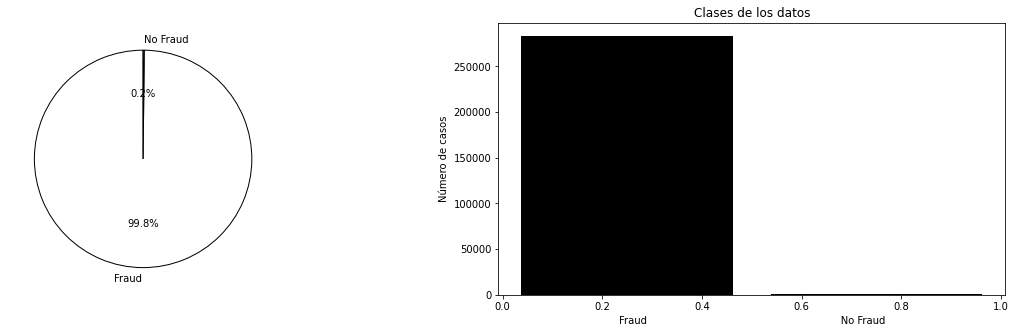

In [52]:
# Imagenes exploratorias

colors = ['white','white']

fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud, fraud]
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
plt.pie(fraud_percentage, labels = ['Fraud','No Fraud'], autopct='%1.1f%%', startangle = 90, colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
plt.hist(x = df['Class'].tolist(), bins = 2, color='black', rwidth=0.85)
plt.title('Clases de los datos')
plt.ylabel('Número de casos')
plt.xlabel('Fraud                                                              No Fraud');

## **Referencias**

* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Credit Card Fraud Detection](https://www.kaggle.com/code/abigaisclcabascango/notebook22aebe45ef)